# Post-processing 


In [5]:
# Packages
import os
import sys
import gc
import math as m
import numpy as np
import scipy
import pandas as pd
from scipy import *
from scipy.signal import butter, filtfilt, hilbert
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from my_funcs import *
# print(istep_c)\import numpy as np
from scipy.interpolate import griddata



In [ ]:
# Configuration for some codes
sys.path.append("/projects/DEIKE/cmartinb/jupyter_notebook/project_specific/turbulence")
os.chdir("/projects/DEIKE/cmartinb/")

In [ ]:
kp = 4
omegap = (1 * kp) ** 0.5


In [ ]:
# PCreate an instance for the class
work_dir = "/projects/DEIKE/cmartinb/ak.02_B0200_custar2/forward/"
processor = DataProcessor(work_dir,  L0=2 * np.pi, N= 512,tot_row=18, k_=4,u_s=0.25, rho_r=1000 / 1.225,  Re_tau=720, h=1)

# Process data
processor.process_data()

# Acces dataframe and properties 
df_velocity_pressure = processor.data  # DataFrame with velocity and pressure
eta_series = processor.eta_series      # Serie eta
istep_c = processor.istep_c            # iteration
time = processor.time                  # Time

print(df_velocity_pressure.head())  # First register of Df


findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


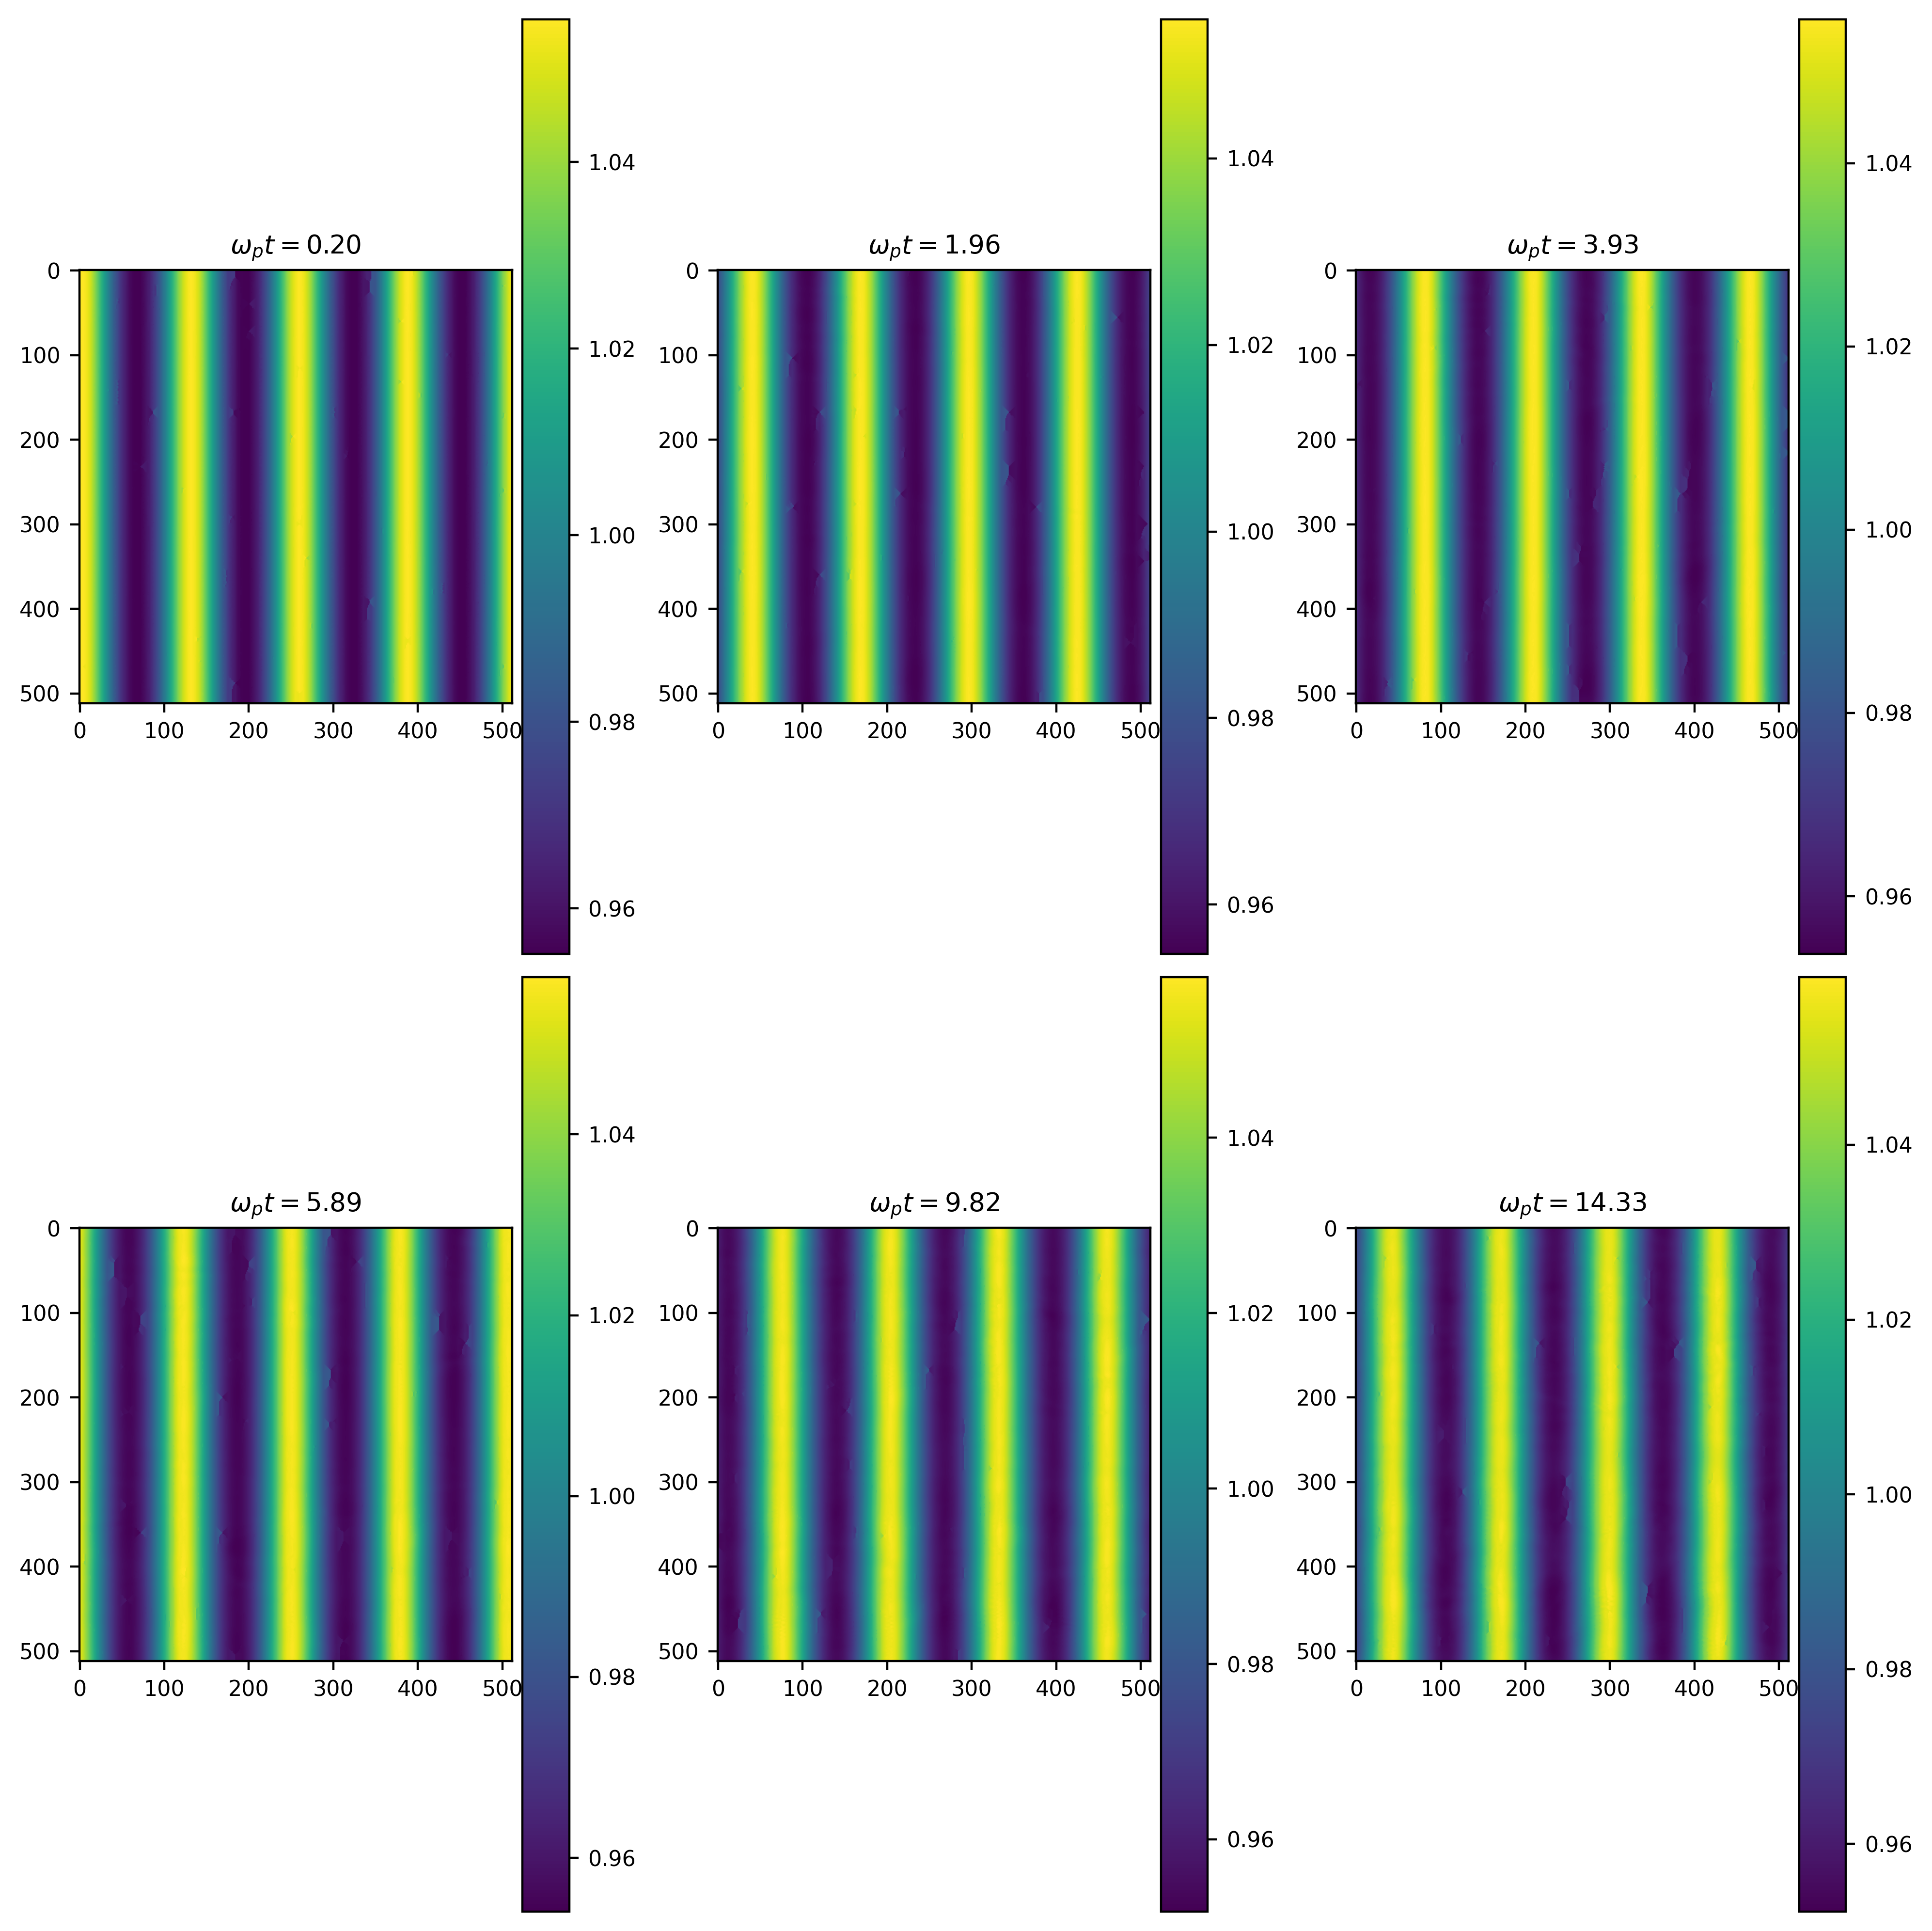

In [5]:
# Indexes of the times we are interested in
ind_time = [1, 10, 20, 30, 50, -1]
tstart = time[0]
# Configuration for the subplot
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Iterate over selected time indexes
for j, i in enumerate(ind_time):
    ax = axes[j // num_cols, j % num_cols]
    eta = eta_series[i]

    # Plot of eta
    im = ax.imshow(eta, cmap='viridis') 

    # Title of the subplot
    ax.set_title(label=r"$\omega_{p} t=%.2f$" % (omegap * (data_processor.time[i] - tstart)))

    # Add colorbar
    fig.colorbar(im, ax=ax, orientation="vertical", pad=0.02)

# Adjust the layout and show the plot
plt.tight_layout()
# plt.savefig("g1_tend", dpi=300)
plt.show()


ux_2d_avg_000030909.bin
uz_2d_avg_000035929.bin
uy_2d_avg_000032389.bin
uv_2d_avg_000033058.bin

In [9]:
# create the grid

Retau = 720
ytau = (2 * np.pi - 1) / Retau
hw = 1
L0 = 2 * m.pi
ustar = 0.25
N=512

x = np.linspace(-L0 / 2, L0 / 2, N)
y = np.linspace(-L0 / 2, L0 / 2, N)
z = np.linspace(-L0 / 2, L0 / 2, N)

X, Y, Z = np.meshgrid(x, y, z, indexing="xy")

print(y.shape)

(512,)


findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


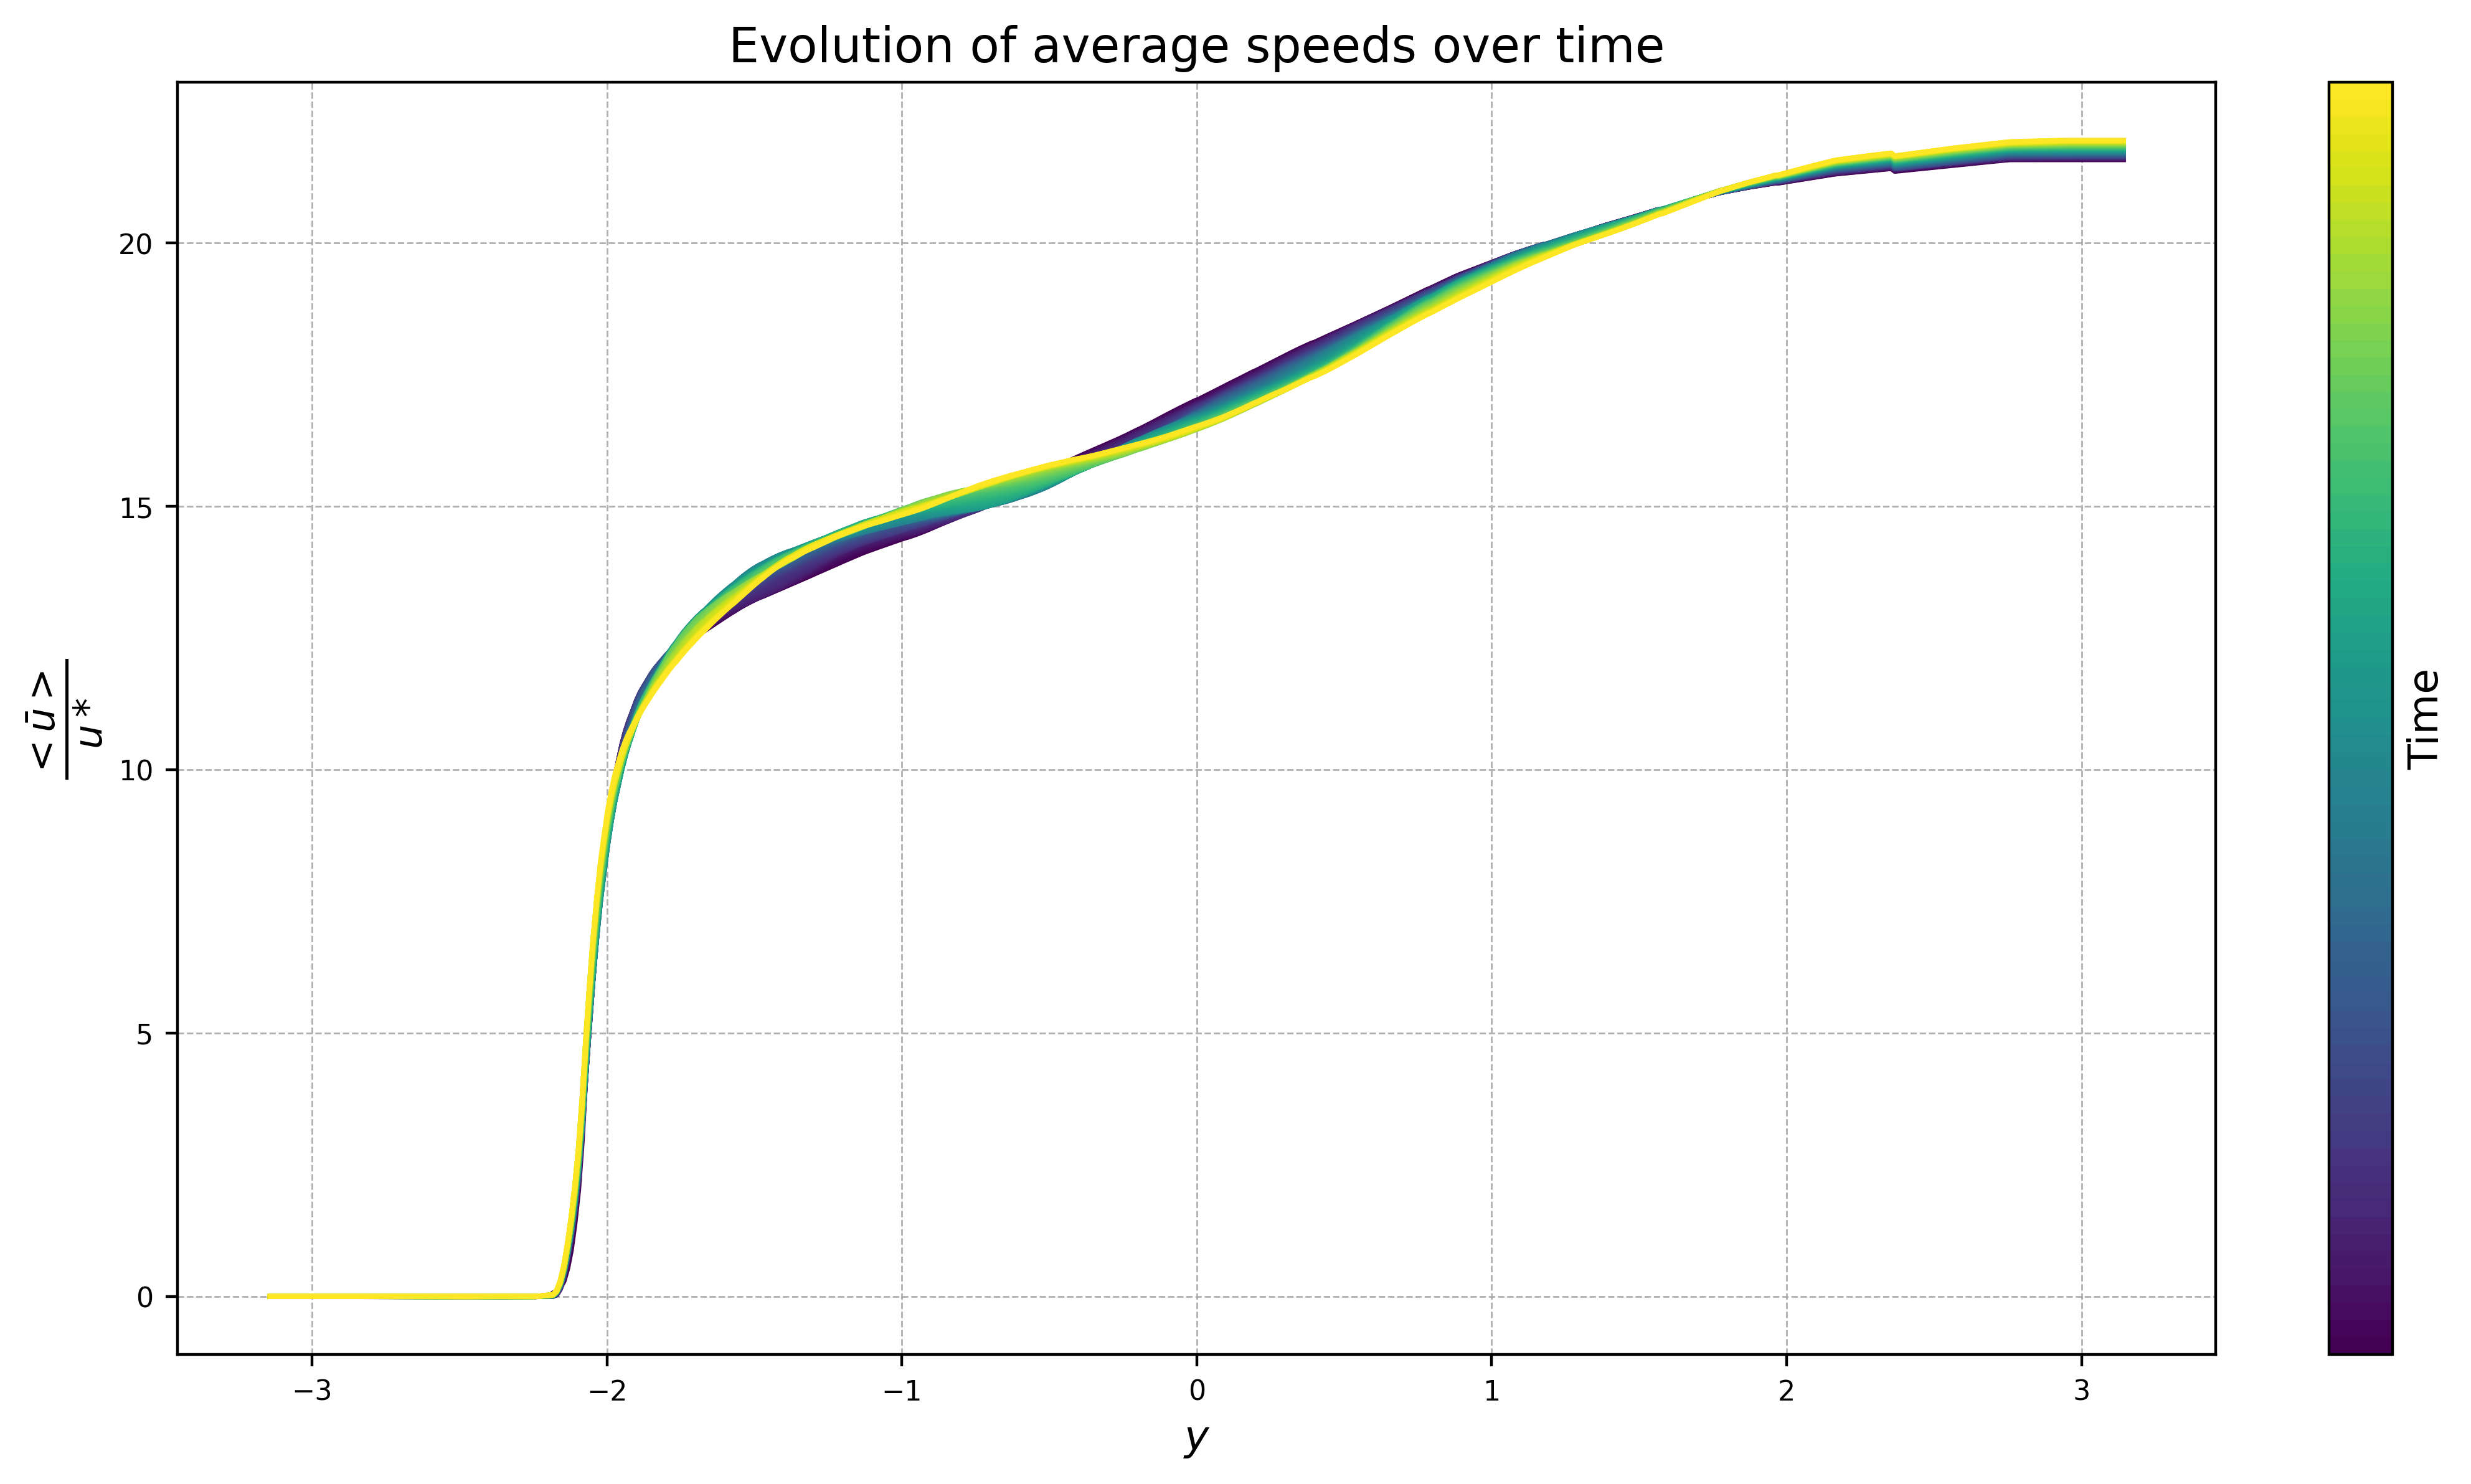

In [10]:
cmap = plt.get_cmap("viridis", len(time.unique()))

fig, ax = plt.subplots(figsize=(10, 6))

for idx, time_value in enumerate(time.unique()):
    df_time = df_velocity_pressure[df_velocity_pressure["t"] == time_value]
    ux_means = df_time["ux_mean"].values[0]
    ax.plot(y, ux_means / ustar, color=cmap(idx), lw=1.5)

cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),
    ax=ax,
    orientation="vertical",
    fraction=0.05,
    pad=0.05,
)
cbar.set_label("Time", size=12)
selected_times = time.unique()[::10]
selected_ticks = np.linspace(0, 1, len(time.unique()))[::10]  

cbar.set_ticks(selected_ticks)
cbar.set_ticklabels([f"{time:.2f}" for time in selected_times])

# Agregar etiquetas, título, etc.
ax.set_xlabel(r"$y$", size=12)
ax.set_ylabel(r"$\frac{<\bar{u}>}{u*}$", size=16)
ax.set_title("Evolución de las velocidades medias a lo largo del tiempo", size=14)
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [26]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import griddata


# Directories of work 
work_dir_forward = "/projects/DEIKE/cmartinb/ak.02_B0200_custar2/forward/"
work_dir_backward = "/projects/DEIKE/cmartinb/ak.02_B0200_custar2/backward/"


# Crear instancias de DataProcessor para cada dirección
processor_forward = DataProcessor(work_dir_forward,L0=2*np.pi, N= 512,tot_row=18, k_=4,u_s=0.25, rho_r=1000 / 1.225,  Re_tau=720, h=1)
processor_backward = DataProcessor(work_dir_backward, L0=2*np.pi, N= 512,tot_row=18, k_=4,u_s=0.25, rho_r=1000 / 1.225,  Re_tau=720, h=1)


# Process data
processor_forward.process_data()
processor_backward.process_data()


# Print first elements
print(processor_forward.data.head())
print(processor_backward.data.head())


# processor_forward.eta_series y processor_backward.eta_series


          i          t                                                 ux  \
0   30837.0  38.500100  [[0.0021364628242347525, 0.0021364628242347525...   
1   30909.0  38.598275  [[0.004743176316571965, 0.004743176316571966, ...   
2   30973.0  38.696450  [[0.004471385129866596, 0.004471385129866596, ...   
3   31037.0  38.794624  [[0.00410751955149771, 0.004107519551497711, 0...   
4   31101.0  38.892799  [[0.0033289379155794605, 0.003328937915579459,...   
..      ...        ...                                                ...   
69  35770.0  45.274159  [[0.0016803270639664187, 0.0016803270639664187...   
70  35851.0  45.372334  [[0.0008949472338975204, 0.0008949472338975204...   
71  35929.0  45.470509  [[9.60723670125922e-05, 9.60723670125922e-05, ...   
72  36001.0  45.568683  [[-0.0006980817674002195, -0.00069808176740021...   
73  36073.0  45.666858  [[-0.0014531231074074215, -0.00145312310740742...   

                                              ux_mean  \
0   [-2.1364628234

In [27]:
# Directories of each case
dirs = {
    "forward_uc2": "/projects/DEIKE/cmartinb/ak.02_B0200_custar2/forward/",
    "backward_uc2": "/projects/DEIKE/cmartinb/ak.02_B0200_custar2/backward/",
    "forward_uc4": "/projects/DEIKE/cmartinb/ak0.2_Bo200_custar4/forward/",
    "backward_uc4": "/projects/DEIKE/cmartinb/ak0.2_Bo200_custar4/backward/",
    "forward_uc8": "/projects/DEIKE/cmartinb/ak0.2_Bo200_custar8/forward/",
    "backward_uc8": "/projects/DEIKE/cmartinb/ak0.2_Bo200_custar8/backward/"
}

# Create a diccionary for the df 
dfs = {}

for key, work_dir in dirs.items():
    processor = DataProcessor(work_dir, N=512, L0=2*np.pi,  N= 512,tot_row=18, k_=4,u_s=0.25, rho_r=1000 / 1.225,  Re_tau=720, h=1)
    processor.process_data()
    dfs[key] = processor.data  

# example
for key, df in dfs.items():
    print(f"Data for {key}:")
    print(df.head())
    print("--------------------------------------")


          i          t                                                 ux  \
0   30837.0  38.500100  [[0.0021364628242347525, 0.0021364628242347525...   
1   30909.0  38.598275  [[0.004743176316571965, 0.004743176316571966, ...   
2   30973.0  38.696450  [[0.004471385129866596, 0.004471385129866596, ...   
3   31037.0  38.794624  [[0.00410751955149771, 0.004107519551497711, 0...   
4   31101.0  38.892799  [[0.0033289379155794605, 0.003328937915579459,...   
..      ...        ...                                                ...   
69  35770.0  45.274159  [[0.0016803270639664187, 0.0016803270639664187...   
70  35851.0  45.372334  [[0.0008949472338975204, 0.0008949472338975204...   
71  35929.0  45.470509  [[9.60723670125922e-05, 9.60723670125922e-05, ...   
72  36001.0  45.568683  [[-0.0006980817674002195, -0.00069808176740021...   
73  36073.0  45.666858  [[-0.0014531231074074215, -0.00145312310740742...   

                                              ux_mean  \
0   [-2.1364628234

In [33]:
import matplotlib.pyplot as plt
import numpy as np


import os
import re

# Preparar la figura y los ejes
fig, axs = plt.subplots(nrows=3, figsize=(12, 48))  # Crear 6 subgráficas

process_and_plot(
    "/projects/DEIKE/cmartinb/ak.02_B0200_custar2/forward/", axs[0], "viridis"
)
process_and_plot(
    "/projects/DEIKE/cmartinb/ak.02_B0200_custar2/backward/", axs[0], "plasma"
)
process_and_plot(
    "/projects/DEIKE/cmartinb/ak0.2_Bo200_custar4/forward/", axs[1], "inferno"
)
process_and_plot(
    "/projects/DEIKE/cmartinb/ak0.2_Bo200_custar4/backward/", axs[1], "magma"
)
process_and_plot(
    "/projects/DEIKE/cmartinb/ak0.2_Bo200_custar8/forward/", axs[2], "cividis"
)
process_and_plot(
    "/projects/DEIKE/cmartinb/ak0.2_Bo200_custar8/backward/", axs[2], "copper"
)

for ax in axs:
    ax.set_xlabel(r"$y$", size=12)
    ax.set_ylabel(r"$\frac{<\bar{u}>}{u*}$", size=16)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

In [2]:

# Pre-process: Process and same the DataFrames
paths = [
    '/projects/DEIKE/cmartinb/ak.02_B0200_custar2/forward/',
    '/projects/DEIKE/cmartinb/ak0.2_Bo200_custar4/forward/',
    '/projects/DEIKE/cmartinb/ak0.2_Bo200_custar8/forward/'
]

for path in paths:
    #save_path = os.path.join(path, "processed_data.csv")
    process_directory(path)

# Graficación:
fig, axs = plt.subplots(nrows=6, figsize=(10, 30))

process_and_plot('/projects/DEIKE/cmartinb/ak.02_B0200_custar2/forward/', axs[0], 'viridis')
process_and_plot('/projects/DEIKE/cmartinb/ak.02_B0200_custar2/forward/', axs[1], 'plasma')
process_and_plot('/projects/DEIKE/cmartinb/ak0.2_Bo200_custar4/forward/', axs[2], 'inferno')
process_and_plot('/projects/DEIKE/cmartinb/ak0.2_Bo200_custar4/forward/', axs[3], 'magma')
process_and_plot('/projects/DEIKE/cmartinb/ak0.2_Bo200_custar8/forward/', axs[4], 'cividis')
process_and_plot('/projects/DEIKE/cmartinb/ak0.2_Bo200_custar8/forward/', axs[5], 'copper')

for ax in axs:
    ax.set_xlabel(r'$y$', size=12)
    ax.set_ylabel(r'$\frac{<\bar{u}>}{u*}$', size=16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/n8/09fd1vx51szcn3pyyz4c342r0000gn/T/ipykernel_7673/2557859144.py:1: SyntaxWarning: invalid escape sequence '\d'
  '''


'\nimport os\nimport re\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\n\ndef extract_custar_from_dir(work_dir):\n    """Extrae el valor de c/ustar a partir del nombre del directorio."""\n    match = re.search(r"custar(\\d+)", work_dir)\n    if match:\n        return match.group(1)\n    return "Unknown"\n\ndef process_data_and_save(work_dir, save_path):\n    df = process_data(work_dir)\n    df.to_csv(save_path, index=False)\n\ndef process_and_plot_from_saved(work_dir, ax, cmap_name):\n    custar_value = extract_custar_from_dir(work_dir)\n    ax.set_title(f"c/ustar = {custar_value}")\n    \n    df = pd.read_csv(os.path.join(work_dir, "processed_data.csv"))\n    \n    # Filtrar tiempos para reducir la superposición\n    unique_times = df[\'t\'].unique()\n    sampled_times = unique_times[::5]\n    cmap = plt.get_cmap(cmap_name, len(sampled_times))\n    \n    for idx, time in enumerate(sampled_times):\n        df_time = df[df[\'t\'] == time]\n        ux_means = f

In [ ]:
# /scratch/gpfs/cm6797/ak0.2_Bo200_custar4/forward/eta

cmap = plt.get_cmap("viridis", len(df["t"].unique()))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through all the unique times in your DataFrame
for idx, time in enumerate(df["t"].unique()):
    df_time = df[df["t"] == time]
    ux_means = df_time["ux_mean"].values[0]
    ax.plot(y, ux_means / ustar, color=cmap(idx), lw=1.5)

# Add a color bar
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),
    ax=ax,
    orientation="vertical",
    fraction=0.05,
    pad=0.05,
)
cbar.set_label("Time", size=12)
all_times = df["t"].unique()
selected_times = all_times[::10]  # Selecciona cada décima etiqueta
selected_ticks = np.linspace(0, 1, len(all_times))[::10]  # Selecciona cada décimo tick

cbar.set_ticks([])
cbar.set_ticklabels([])
# Add labels, title, etc.
ax.set_xlabel(r"$y$", size=12)
ax.set_ylabel(r"$\frac{<\bar{u}>}{u*}$", size=16)
ax.set_title("Evolution of average speeds over time", size=14)
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()